# kNN: k Nearest Neighbor: test categorical metrics

In [14]:
# Imports
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import metrics

## Read the CSV file

In [15]:
# Read the csv file into a pandas DataFrame
carbon = pd.read_csv('presolargrains_carbon_letters.csv')
carbon.head()

,Type,carbon_isotopes
0,X,9455.10
1,X,6793.00
2,X,6227.00
3,X,4250.00
4,X,3993.46


In [16]:
# Set Type for y value
X = carbon.drop("Type", axis=1)
y = carbon['Type'].values.reshape(-1, 1)
target_names = ["AB", "C", "M", "N", "U", "X", "Y", "Z"]
print(X.shape, y.shape)

(15622, 1) (15622, 1)


In [17]:
# Label Encoder and Transform
label_encoder = LabelEncoder()

data = X.copy()

label_encoder.fit(data['carbon_isotopes'])
label_encoder.transform(data.carbon_isotopes)
label_encoder.classes_

array([1.3000e+00, 1.4200e+00, 1.5700e+00, ..., 6.2270e+03, 6.7930e+03,
       9.4551e+03])

## Create Train Test Split

In [18]:
# Separate data into train and test buckets
data_train, data_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [19]:
# MinMaxScalar
data_minmax = MinMaxScaler().fit(data_train)

data_train_minmax = data_minmax.transform(data_train)
data_test_minmax = data_minmax.transform(data_test)


## Find the best k value

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data_train_minmax, y_train)
    train_score = knn.score(data_train_minmax, y_train)
    test_score = knn.score(data_test_minmax, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 0.955/0.900
k: 3, Train/Test Score: 0.945/0.933
k: 5, Train/Test Score: 0.943/0.939
k: 7, Train/Test Score: 0.943/0.941
k: 9, Train/Test Score: 0.943/0.941
k: 11, Train/Test Score: 0.942/0.942
k: 13, Train/Test Score: 0.942/0.942
k: 15, Train/Test Score: 0.942/0.941
k: 17, Train/Test Score: 0.942/0.941
k: 19, Train/Test Score: 0.942/0.941


## Plot the train and test scores

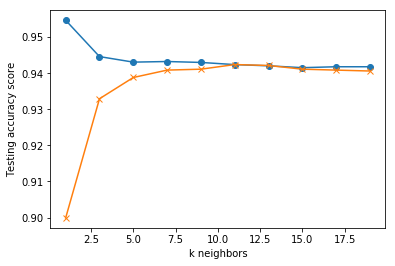

In [20]:
# Plot train scores in blue with marker 'o' and test scores in orange with marker 'x'
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

## Train the model and return the test score

In [8]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(data_train_minmax, y_train)
print('k=11 Test Acc: %.3f' % knn.score(data_test_minmax, y_test))

k=11 Test Acc: 0.942


In [21]:
# Predict classes (Types)
encoded_predictions = knn.predict(data_test_minmax)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

ValueError: y contains previously unseen labels: ['AB' 'M' 'X' 'Y']

In [ ]:
# Create and print dataframe with predicted and actual types
pd.DataFrame({"Prediction": prediction_labels, "Actual": y_test}).reset_index(drop=True)

In [ ]:
tensorflow.keras.metrics.categorical_accuracy(y_test, y_pred)

## Save the model

In [22]:
#    Already saved model to file
#filename = 'kNN.sav'
#joblib.dump(knn, filename)

## Summary:

### k Nearest Neighbor (k=11): 94.2%